# U.S. Medical Insurance Costs

In [1]:
#load libraries needed for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv into python

data = pd.read_csv('insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
average_age = np.mean(data.age)
print(average_age)

39.20702541106129


In [5]:
def cat_var_count(cat_var, sub_cat_var):
    category = data[cat_var]
    num_in_cat = 0
    for c in category:
        if c == sub_cat_var:
            num_in_cat += 1
    print('There are ' + str(num_in_cat) + ' people in the category ' + cat_var + ' with the attribute ' + sub_cat_var)
cat_var_count('sex', 'male')
cat_var_count('region', 'southeast')
cat_var_count('smoker', 'yes')
cat_var_count('smoker', 'no')

There are 676 people in the category sex with the attribute male
There are 364 people in the category region with the attribute southeast
There are 274 people in the category smoker with the attribute yes
There are 1064 people in the category smoker with the attribute no


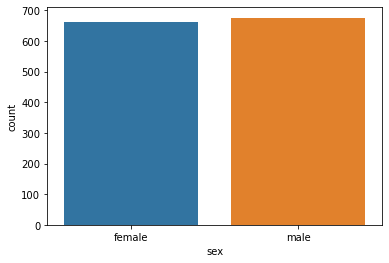

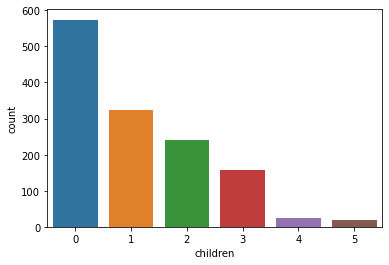

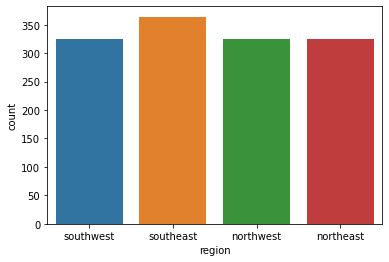

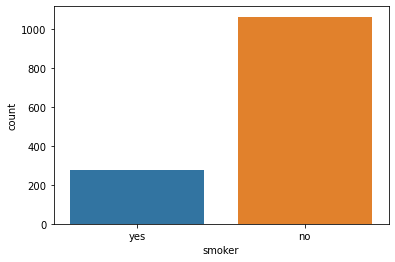

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x = data.sex)
plt.show()
plt.clf()
sns.countplot(x = data.children)
plt.show()
plt.clf()
sns.countplot(x = data.region)
plt.show()
plt.clf()
sns.countplot(x = data.smoker)
plt.show()
plt.clf()

    

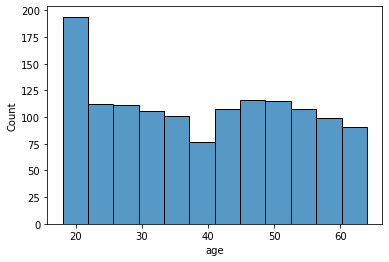

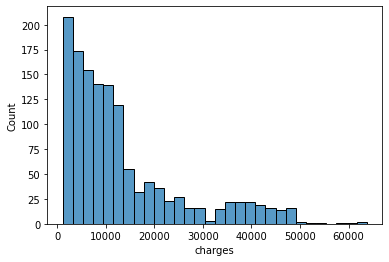

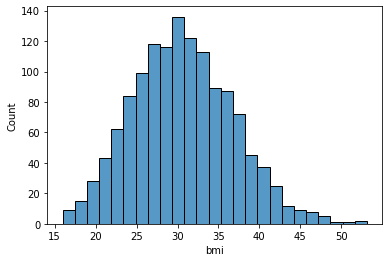

<Figure size 432x288 with 0 Axes>

In [7]:
sns.histplot(data=data, x="age")
plt.show()
plt.clf()

sns.histplot(data=data, x="charges")
plt.show()
plt.clf()

sns.histplot(data=data, x="bmi")
plt.show()
plt.clf()


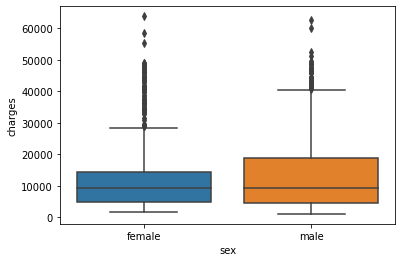

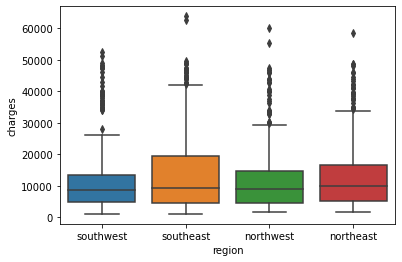

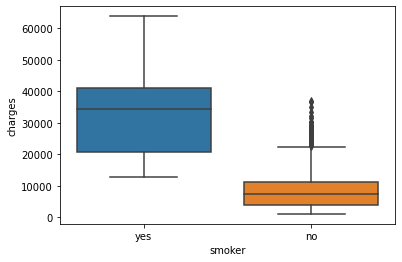

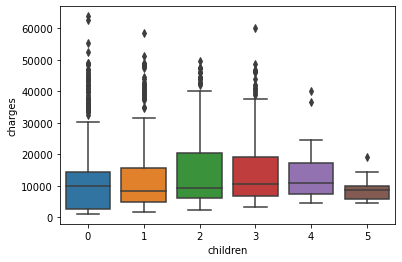

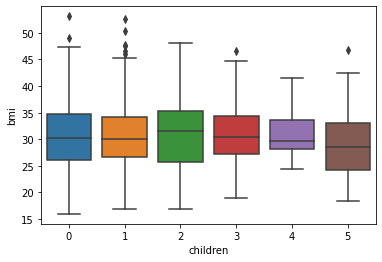

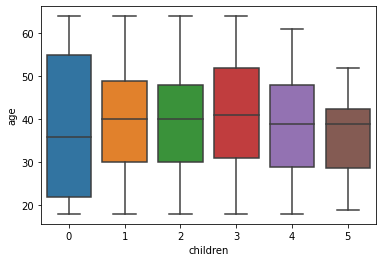

<Figure size 432x288 with 0 Axes>

In [8]:
sns.boxplot(data = data, x = 'sex', y = 'charges')
plt.show()
plt.clf()

sns.boxplot(data = data, x = 'region', y = 'charges')
plt.show()
plt.clf()

sns.boxplot(data = data, x = 'smoker', y = 'charges')
plt.show()
plt.clf()


sns.boxplot(data = data, x = 'children', y = 'charges')
plt.show()
plt.clf()


sns.boxplot(data = data, x = 'children', y = 'bmi')
plt.show()
plt.clf()

sns.boxplot(data = data, x = 'children', y = 'age')
plt.show()
plt.clf()

In [9]:
data[['age', 'charges', 'bmi', 'children']].corr()

,age,charges,bmi,children
age,1.000000,0.299008,0.109272,0.042469
charges,0.299008,1.000000,0.198341,0.067998
bmi,0.109272,0.198341,1.000000,0.012759
children,0.042469,0.067998,0.012759,1.000000


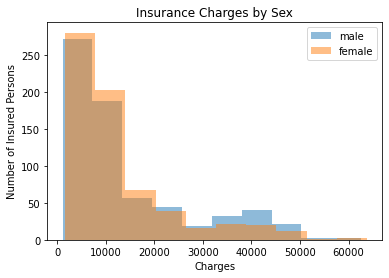

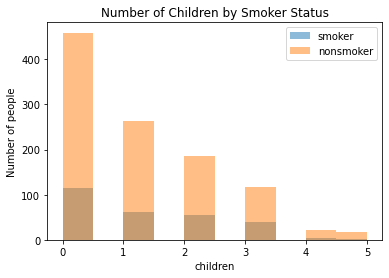

In [10]:
###Overlapping histogram for gender and cost
charges_male = data.charges[data.sex == 'male']
charges_female = data.charges[data.sex == 'female']

#create the overlapping histograms here:
plt.hist(charges_male, label = "male", alpha = 0.5)
plt.hist(charges_female, label = "female", alpha = 0.5)
plt.legend()
plt.xlabel("Charges")
plt.ylabel("Number of Insured Persons")
plt.title("Insurance Charges by Sex")
plt.show()


children_smoker = data.children[data.smoker == 'yes']
children_nonsmoker = data.children[data.smoker == 'no']

#create the overlapping histograms here:
plt.hist(children_smoker, label = "smoker", alpha = 0.5)
plt.hist(children_nonsmoker, label = "nonsmoker", alpha = 0.5)
plt.legend()
plt.xlabel("children")
plt.ylabel("Number of people")
plt.title("Number of Children by Smoker Status")
plt.show()

##### histogram of age for people who have kids and people who do not have kids

In [11]:
#####two binary categorical sex and smoking### NEED TO CLEAN THIS UP### PVAL ????? I
###I'm not sure if this is significant or not and I need to find out before I finalize this section


smoker_sex_freq = pd.crosstab(data.sex, data.smoker)
print(smoker_sex_freq)

smoker_sex_prop = smoker_sex_freq/len(data)
print(smoker_sex_prop)

# calculate and print smoker_marginals
smoker_marginals = smoker_sex_prop.sum(axis = 0)
print(smoker_marginals)

# calculate and print sex_marginals
sex_marginals = smoker_sex_prop.sum(axis=1)
print(sex_marginals)

from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(smoker_sex_freq)


# print out the expected frequency table
print("expected contingency table (no association):")
print(np.round(expected))

chi2, pval, dof, expected = chi2_contingency(smoker_sex_freq)
print(chi2)

smoker   no  yes
sex             
female  547  115
male    517  159
smoker        no       yes
sex                       
female  0.408819  0.085949
male    0.386398  0.118834
smoker
no     0.795217
yes    0.204783
dtype: float64
sex
female    0.494768
male      0.505232
dtype: float64
expected contingency table (no association):
[[526. 136.]
 [538. 138.]]
7.39291081459996


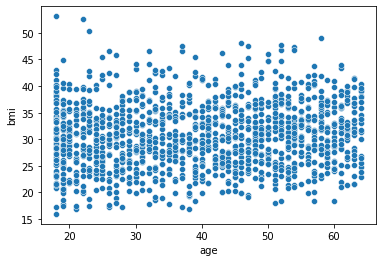

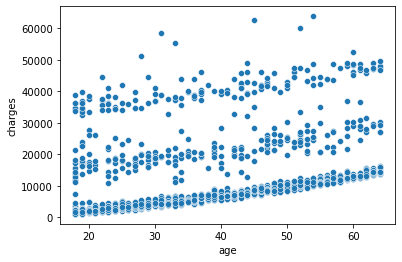

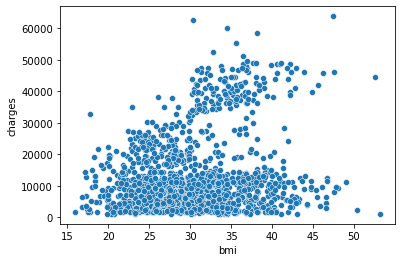

<Figure size 432x288 with 0 Axes>

In [12]:
sns.scatterplot(data=data, x="age", y="bmi")
plt.show()
plt.clf()

sns.scatterplot(data=data, x="age", y="charges")
plt.show()
plt.clf()

sns.scatterplot(data=data, x="bmi", y="charges")
plt.show()
plt.clf()

<AxesSubplot:>

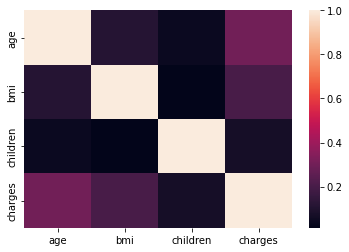

In [13]:
sns.heatmap(data.corr())

In [14]:
data = data[data.children != 0]

In [15]:
mean_age_with_kids = np.mean(data.age)
print(mean_age_with_kids)

39.78010471204188
